# ME:4111 Scientific Computing and Machine Learning 
# Lecture 23: Regularization
# by Prof. Shaoping Xiao

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### generate dataset (angle is from 60 degree to 300 degree)

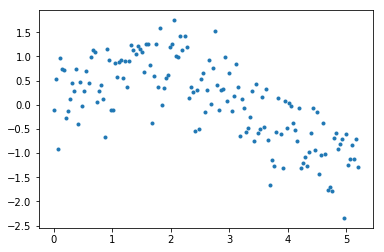

In [2]:
x = np.array([i*np.pi/180 for i in range(0,300,2)])
np.random.seed(426)  # Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.5,len(x))
X=x.reshape(-1,1) # array -> column vector
y=y.reshape(-1,1)
plt.plot(X,y,'.')
plt.show()

### training/test split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 426)

### adding polynomial features

In [7]:
from sklearn.preprocessing import PolynomialFeatures
ndegree = 15
poly = PolynomialFeatures(degree = ndegree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

### linear regression for polynomial

In [8]:
from sklearn.linear_model import LinearRegression
linreg_poly = LinearRegression().fit(X_train_poly, y_train)
print('w: {},\nb: {}'
     .format(linreg_poly.coef_, linreg_poly.intercept_))
print('R-squared score: {:.3f}(training) and {:.3f}(test) '
     .format(linreg_poly.score(X_train_poly, y_train), linreg_poly.score(X_test_poly, y_test)))

w: [[ 0.00000000e+00  6.55898142e+00 -7.37174262e+01  3.94921980e+02
  -1.11146511e+03  1.87058858e+03 -2.04326726e+03  1.52481158e+03
  -8.02068835e+02  3.02336767e+02 -8.19994422e+01  1.58614500e+01
  -2.13352530e+00  1.89471117e-01 -9.97852723e-03  2.35783992e-04]],
b: [-0.10251677]
R-squared score: 0.662(training) and 0.528(test) 


### plot

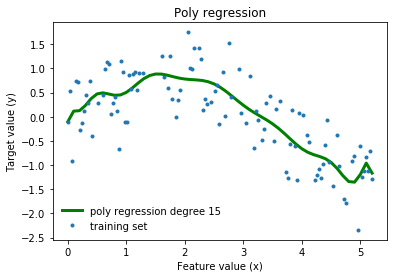

In [9]:
# get data to plot regression line
X_plot=np.arange(X.min(), X.max(), 0.1) 
X_plot=X_plot.reshape(-1,1)
X_plot_poly = poly.fit_transform(X_plot)
y_plot=linreg_poly.predict(X_plot_poly)

# Plot the regression line as well as the training data
plt.figure()
plt.plot(X_plot, y_plot, 'g-', label='poly regression degree {}'.format(ndegree), linewidth =3)
plt.plot(X_train,y_train,'.', label='training set')
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.5)
plt.title('Poly regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### without feature scaling, the matrix could be ill-conditioned

C:\Users\chorn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.630483e-22
  overwrite_a=True).T


w: [[ 0.00000000e+00  8.40076609e-02  7.25862639e-02  5.64671966e-02
   3.90362138e-02  1.99751925e-02  5.66632304e-04 -1.50733284e-02
  -1.89840869e-02 -2.29558684e-03  2.74997892e-02 -2.01717018e-02
   6.79079856e-03 -1.22792681e-03  1.16043909e-04 -4.51829230e-06]],
b: [0.25163019]
R-squared score: 0.655(training) and 0.548(test) 


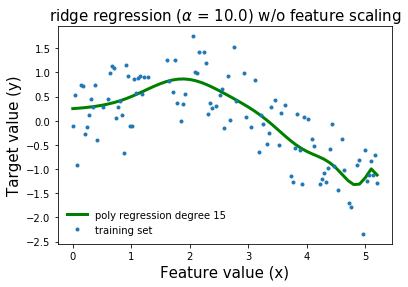

In [10]:
from sklearn.linear_model import Ridge
alpha_ = 10.0
linridge = Ridge(alpha=alpha_).fit(X_train_poly, y_train)
print('w: {},\nb: {}'
     .format(linridge.coef_, linridge.intercept_))
print('R-squared score: {:.3f}(training) and {:.3f}(test) '
     .format(linridge.score(X_train_poly, y_train), linridge.score(X_test_poly, y_test)))

y_plot=linridge.predict(X_plot_poly)
plt.figure()
plt.plot(X_plot, y_plot, 'g-', label='poly regression degree {}'.format(ndegree), linewidth =3)
plt.plot(X_train,y_train,'.', label='training set')
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.5)
plt.title('ridge regression ($\\alpha$ = {}) w/o feature scaling'.format(alpha_),size=15)
plt.xlabel('Feature value (x)',size=15)
plt.ylabel('Target value (y)',size=15)
plt.show()

### Feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)
X_plot_scaled = scaler.transform(X_plot_poly)

### Ridge regression after feature scaling

w: [[ 0.          0.95829479  0.28089269 -2.32733725 -2.09246771  0.09457835
   1.69336591  1.94908868  1.20599226  0.0840778  -0.89885582 -1.42735146
  -1.37329802 -0.74773008  0.34789065  1.76076524]],
b: [0.02124798]
R-squared score: 0.656(training) and 0.542(test) 


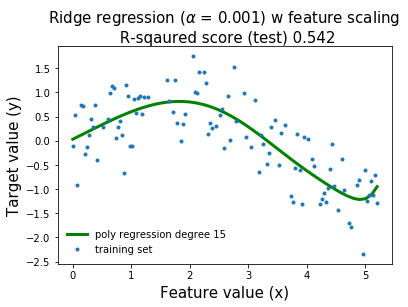

In [12]:
alpha_ = 0.001
linridge = Ridge(alpha=alpha_).fit(X_train_scaled, y_train)
print('w: {},\nb: {}'
     .format(linridge.coef_, linridge.intercept_))
print('R-squared score: {:.3f}(training) and {:.3f}(test) '
     .format(linridge.score(X_train_scaled, y_train), linridge.score(X_test_scaled, y_test)))

y_plot=linridge.predict(X_plot_scaled)
plt.figure()
plt.plot(X_plot, y_plot, 'g-', label='poly regression degree {}'.format(ndegree), linewidth =3)
plt.plot(X_train,y_train,'.', label='training set')
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.5)
plt.title('Ridge regression ($\\alpha$ = {}) w feature scaling \n R-sqaured score (test) {:.3f}'.
          format(alpha_, linridge.score(X_test_scaled, y_test)),size=15)
plt.xlabel('Feature value (x)',size=15)
plt.ylabel('Target value (y)',size=15)
plt.show()

### Lasso regression

C:\Users\chorn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


w: [ 0.          1.22547169 -0.93101272 -1.77451693 -0.          0.
  0.69204331  0.28730351  0.         -0.         -0.         -0.
 -0.         -0.          0.          0.00684495],
b: [0.02124798]
R-squared score: 0.655(training) and 0.533(test) 


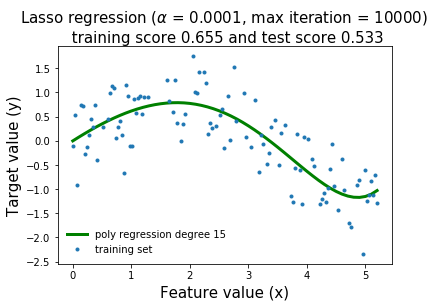

In [13]:
from sklearn.linear_model import Lasso
alpha_ = 0.0001
nmax = 10000
linlasso = Lasso(alpha=alpha_, max_iter = nmax).fit(X_train_scaled, y_train)
print('w: {},\nb: {}'
     .format(linlasso.coef_, linlasso.intercept_))
print('R-squared score: {:.3f}(training) and {:.3f}(test) '
     .format(linlasso.score(X_train_scaled, y_train), linlasso.score(X_test_scaled, y_test)))

y_plot=linlasso.predict(X_plot_scaled)
plt.figure()
plt.plot(X_plot, y_plot, 'g-', label='poly regression degree {}'.format(ndegree), linewidth =3)
plt.plot(X_train,y_train,'.', label='training set')
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.5)
plt.title('Lasso regression ($\\alpha$ = {}, max iteration = {}) \n training score {:.3f} and test score {:.3f}'
          .format(alpha_, nmax, linlasso.score(X_train_scaled, y_train), linlasso.score(X_test_scaled, y_test)),size=15)
plt.xlabel('Feature value (x)',size=15)
plt.ylabel('Target value (y)', size=15)
plt.show()